In [ ]:
import pandas as pd

# Load CSV
df = pd.read_csv("data.csv")
print(df.head())
#hello


   Sno.  hours  days months    names   timestamp
0     0      1    19    May  Person4  2020-05-19
1     1     22    19    May  Person3  2020-05-19
2     2     22    19    May  Person3  2020-05-19
3     3     22    19    May  Person1  2020-05-19
4     4     22    19    May  Person3  2020-05-19


In [3]:
# Check basic info
print(df.info())

# Remove duplicates
df = df.drop_duplicates()

# Check nulls
print(df.isnull().sum())

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51575 entries, 0 to 51574
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sno.       51575 non-null  int64 
 1   hours      51575 non-null  int64 
 2   days       51575 non-null  int64 
 3   months     51575 non-null  object
 4   names      51575 non-null  object
 5   timestamp  51575 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.4+ MB
None
Sno.         0
hours        0
days         0
months       0
names        0
timestamp    0
dtype: int64


In [4]:
print(df.describe(include='all'))
print(df['names'].value_counts())
print(df['timestamp'].value_counts().sort_index())


                Sno.         hours          days months    names  \
count   51575.000000  51575.000000  51575.000000  51575    51575   
unique           NaN           NaN           NaN      4        4   
top              NaN           NaN           NaN   July  Person1   
freq             NaN           NaN           NaN  20824    17543   
mean    25787.000000     12.041551     14.571905    NaN      NaN   
min         0.000000      0.000000      1.000000    NaN      NaN   
25%     12893.500000      2.000000      7.000000    NaN      NaN   
50%     25787.000000     14.000000     12.000000    NaN      NaN   
75%     38680.500000     19.000000     24.000000    NaN      NaN   
max     51574.000000     23.000000     31.000000    NaN      NaN   
std     14888.564404      8.152448      9.553132    NaN      NaN   

                            timestamp  
count                           51575  
unique                            NaN  
top                               NaN  
freq                   

In [6]:
# print('Shape',df.shape)
# print(df.describe())
# print(df.duplicated().sum())
print((df==0).sum())

Sno.            1
hours        4185
days            0
months          0
names           0
timestamp       0
dtype: int64


/tmp/ipykernel_17109/635982397.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=person_counts.index, y=person_counts.values, palette='viridis')


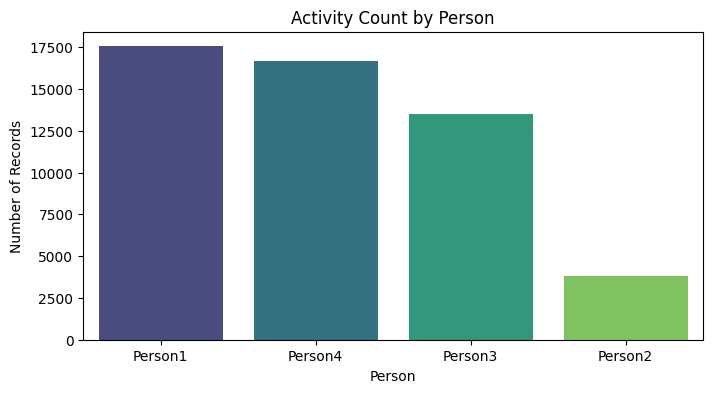

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

person_counts = df['names'].value_counts()

plt.figure(figsize=(8, 4))
sns.barplot(x=person_counts.index, y=person_counts.values, palette='viridis')
plt.title("Activity Count by Person")
plt.ylabel("Number of Records")
plt.xlabel("Person")
plt.show()


/tmp/ipykernel_17109/1214970375.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=person_hours.index, y=person_hours.values, palette='magma')


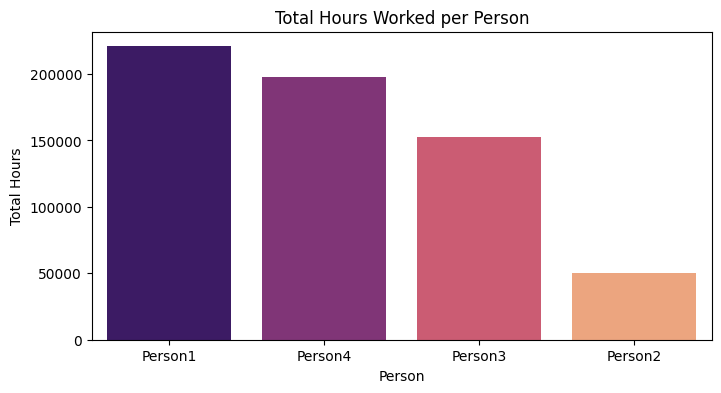

In [8]:
person_hours = df.groupby('names')['hours'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=person_hours.index, y=person_hours.values, palette='magma')
plt.title("Total Hours Worked per Person")
plt.ylabel("Total Hours")
plt.xlabel("Person")
plt.show()


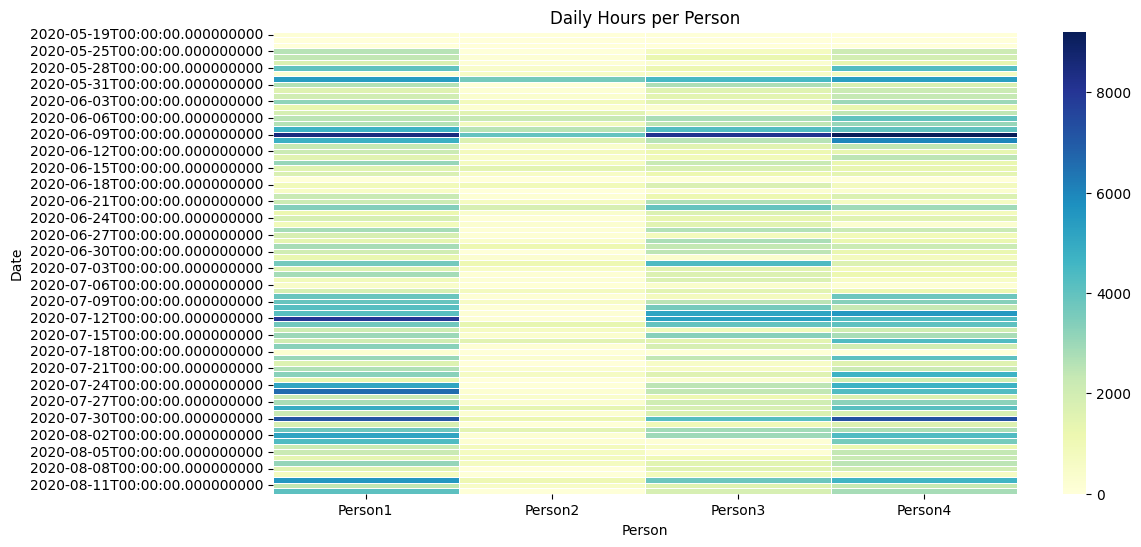

In [9]:
pivot_table = df.pivot_table(values='hours', index='timestamp', columns='names', aggfunc='sum')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table.fillna(0), cmap='YlGnBu', linewidths=.5)
plt.title("Daily Hours per Person")
plt.xlabel("Person")
plt.ylabel("Date")
plt.show()


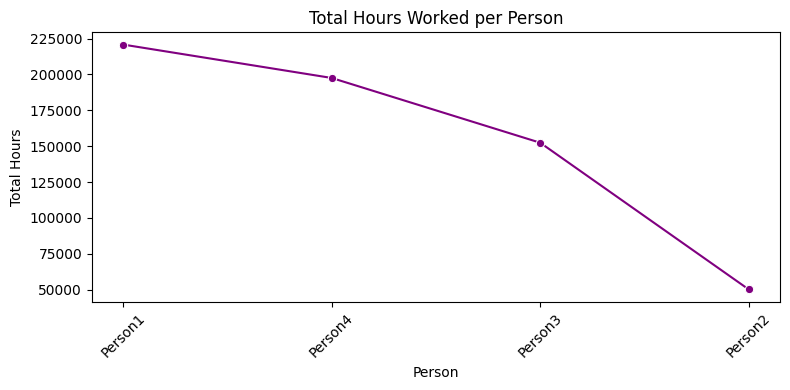

In [10]:
person_hours = df.groupby('names')['hours'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.lineplot(x=person_hours.index, y=person_hours.values, marker='o', color='purple')  # Added markers for clarity
plt.title("Total Hours Worked per Person")
plt.ylabel("Total Hours")
plt.xlabel("Person")
plt.xticks(rotation=45)  # rotate labels if needed for readability
plt.tight_layout()  # to avoid clipping labels
plt.show()
